In [46]:
!pip install yfinance

In [47]:
!pip install pandas-datareader

In [48]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
import yfinance as yf

In [50]:
name = 'SON.LS'
ticker = yf.Ticker(name)
sonae = ticker.history(intervals = '1d', start = '2010-01-01', end = '2021-02-17')
sonae.reset_index(inplace = True)

sonae

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04,0.527166,0.535601,0.525358,0.535601,6873390,0.0,0
1,2010-01-05,0.535601,0.541023,0.533793,0.539216,11145612,0.0,0
2,2010-01-06,0.539818,0.544035,0.533191,0.541023,5711067,0.0,0
3,2010-01-07,0.540420,0.551265,0.536806,0.548253,6418985,0.0,0
4,2010-01-08,0.551867,0.564519,0.547048,0.563314,8695659,0.0,0
...,...,...,...,...,...,...,...,...
2842,2021-02-10,0.670500,0.675000,0.662500,0.663000,1935336,0.0,0
2843,2021-02-11,0.663000,0.665500,0.650000,0.655000,3728741,0.0,0
2844,2021-02-12,0.656500,0.656500,0.640500,0.647500,2936953,0.0,0
2845,2021-02-15,0.655000,0.674500,0.651000,0.671500,3057791,0.0,0


In [51]:
#Let's remove the columns Dividends e Stock Splits
sonae = sonae.drop(columns = ['Dividends', 'Stock Splits'], axis = 1)
sonae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2847 non-null   datetime64[ns]
 1   Open    2847 non-null   float64       
 2   High    2847 non-null   float64       
 3   Low     2847 non-null   float64       
 4   Close   2847 non-null   float64       
 5   Volume  2847 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 133.6 KB


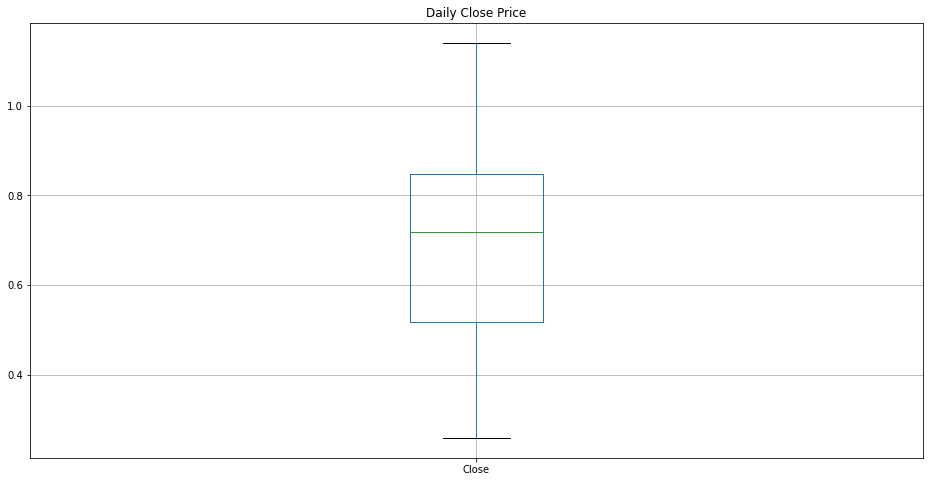

In [52]:
#Before normalize let's see if there is outliers
#plotting close price
fig, ax = plt.subplots()

sonae['Close'].plot.box(grid = True, figsize = (16, 8))
ax.set_title("Daily Close Price");

In [53]:
#Let's create a function to normalize the data based on the initial prices
def normalize(df):
  x = df.copy()

  #creating a loop to go through the data(ignoring time columns with index = 0)
  for i in x.columns[1:]:
    x[i] = x[i] / x[i][0]
  
  return x

In [54]:
normalize(sonae).tail(10)

,Date,Open,High,Low,Close,Volume
2837,2021-02-03,1.262411,1.251866,1.244864,1.226660,0.382922
2838,2021-02-04,1.246287,1.237863,1.245816,1.226660,0.329548
2839,2021-02-05,1.252926,1.249065,1.248671,1.235996,0.341193
2840,2021-02-08,1.266205,1.252799,1.260092,1.238796,0.340894
2841,2021-02-09,1.259566,1.251866,1.254382,1.249065,0.375876
2842,2021-02-10,1.271896,1.260268,1.261044,1.237863,0.281569
2843,2021-02-11,1.257669,1.242530,1.237250,1.222926,0.542489
2844,2021-02-12,1.245339,1.225727,1.219168,1.208923,0.427293
2845,2021-02-15,1.242493,1.259334,1.239154,1.253733,0.444874
2846,2021-02-16,1.281380,1.313479,1.280078,1.307878,1.033507


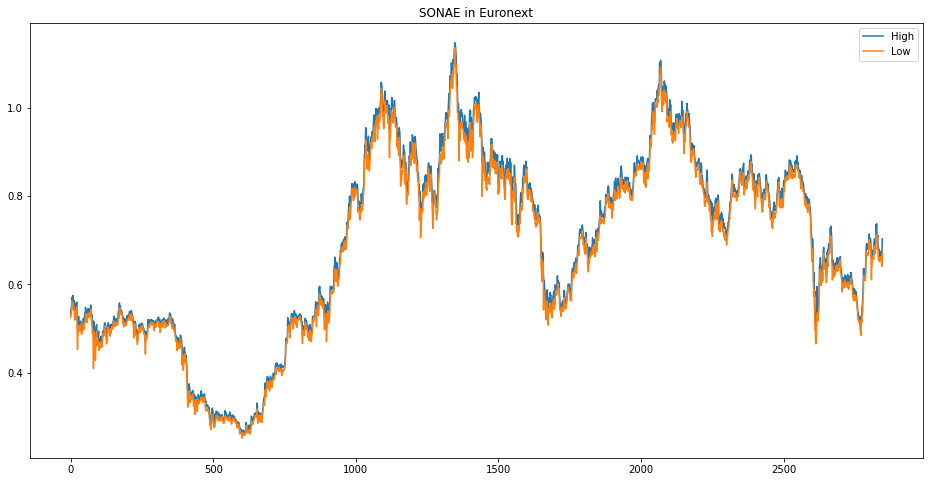

In [55]:
#Plotting the maximum and minimum daily values for the entire period.
sonae[['High', 'Low']].plot(figsize = (16, 8), title = 'SONAE in Euronext')

In [81]:
#Let's see the moving average for 14 days and for 30 days and daily return
sonae['14-Day Moving Average'] = sonae.Close.rolling(14).mean()
sonae['30-Day Moving Average'] = sonae.Close.rolling(30).mean()
sonae['Daily Return'] = sonae.Close.pct_change()
sonae.reset_index(inplace = True)

sonae.tail(10)

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-Day Moving Average,30-Day Moving Average,Daily Return
2836,2836,2021-02-02,0.6615,0.6645,0.6520,0.6610,3664274,0.0,0,0.692571,0.681283,0.000000
2837,2837,2021-02-03,0.6655,0.6705,0.6540,0.6570,2631975,0.0,0,0.688786,0.681150,-0.006051
2838,2838,2021-02-04,0.6570,0.6630,0.6545,0.6570,2265113,0.0,0,0.684107,0.681417,0.000000
2839,2839,2021-02-05,0.6605,0.6690,0.6560,0.6620,2345150,0.0,0,0.680071,0.681717,0.007610
2840,2840,2021-02-08,0.6675,0.6710,0.6620,0.6635,2343100,0.0,0,0.676214,0.682017,0.002266
2841,2841,2021-02-09,0.6640,0.6705,0.6590,0.6690,2583544,0.0,0,0.673286,0.682317,0.008289
2842,2842,2021-02-10,0.6705,0.6750,0.6625,0.6630,1935336,0.0,0,0.670500,0.681883,-0.008969
2843,2843,2021-02-11,0.6630,0.6655,0.6500,0.6550,3728741,0.0,0,0.666786,0.681467,-0.012066
2844,2844,2021-02-12,0.6565,0.6565,0.6405,0.6475,2936953,0.0,0,0.664143,0.681000,-0.011450
2845,2845,2021-02-15,0.6550,0.6745,0.6510,0.6715,3057791,0.0,0,0.663107,0.681350,0.037066


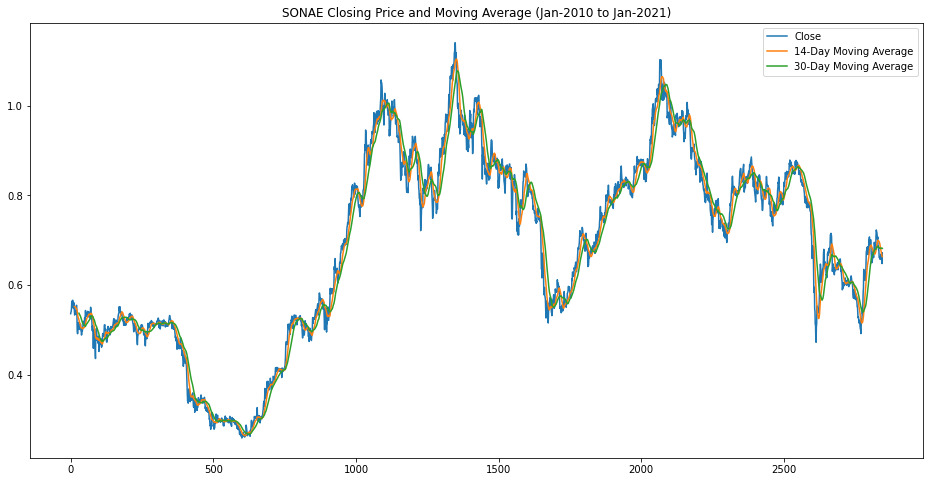

In [83]:
#Let's plot the close price and their moving average
columns = ['Close', '14-Day Moving Average', '30-Day Moving Average']
graph = sonae[columns].plot(figsize = (16, 8), title = 'SONAE Closing Price and Moving Average (Jan-2010 to Jan-2021)')

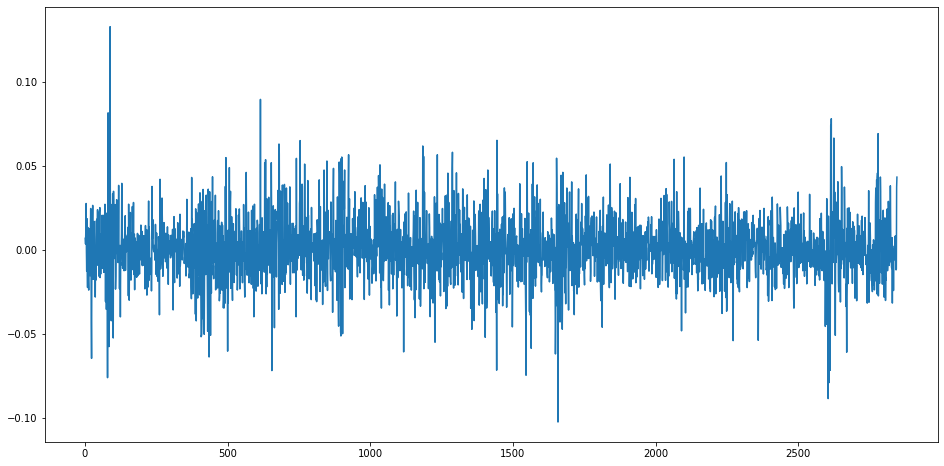

In [59]:
#plotting daily return static graph
sonae['Daily Return'].plot(figsize = (16, 8))
plt.show()

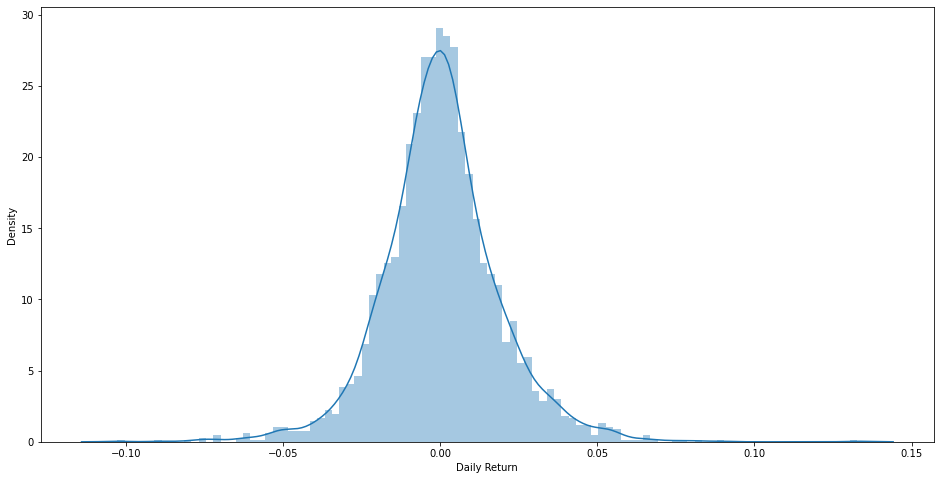

In [60]:
#Let's plot the distribuition of the daily return
fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))
sns.distplot(sonae['Daily Return'].dropna(), bins=100, ax=ax1)
plt.show()

In [61]:
sonae['Daily Return'].isnull().sum()

1

In [62]:
# Once there is one missing value in the Daily Return, let's change it by mean of Daily Return
sonae.loc[(sonae['Daily Return'].isnull() == True), 'Daily Return'] = sonae['Daily Return'].mean()

In [63]:
#Let's plot daily returns and normal distribuition
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [64]:
t = np.linspace(0.01, 0.99, 1000)

q1 = np.quantile(sonae['Daily Return'], t)
 
q2 = norm.ppf(t, loc=np.mean(sonae['Daily Return']), scale = np.std(sonae['Daily Return']))

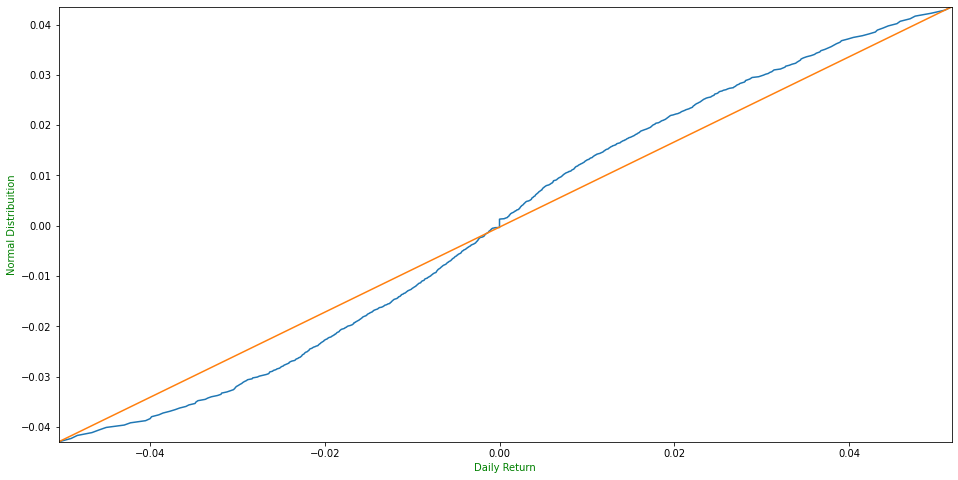

In [65]:
plt.figure(figsize= (16,8))
plt.plot(q1, q2)
plt.plot([min(q1), max(q1)], [min(q2), max(q2)])

plt.xlim((min(q1), max(q1)))
plt.ylim((min(q2), max(q2)))

plt.xlabel("Daily Return", color = 'g')
plt.ylabel("Normal Distribuition", color = 'g')

plt.show()

After all the plots helping us in visualization and analysis, let's use use Facebook Prophet for making predictions about the SONAE's Price in Euronext

The Prophet tool allows us to generate forecasts and future scenarios for time series.

Some of its advantages are: 

1. daily, weekly and monthly analyzes with a few months of history
2. seasonality by day of the week and time of year
3. important holidays with irregular intervals
4. sudden trend changes and outliers

In [66]:
!pip install pystan

In [67]:
!pip install fbprophet

In [68]:
import fbprophet
import warnings

In [69]:
from fbprophet import  Prophet

In [70]:
warnings.filterwarnings('ignore')

*DISCLAIMER: It is necessary to mention that stock prices are volatile and are generallry hard to predict.The content of this Notebook is for Educacional purposes only, you should not construe any such information or other material as legal, tax, investment, financial, or other advice. Invest at your own risk*

In [71]:
name = 'SON.LS'

ticker = yf.Ticker(name)

sonae = ticker.history(interval='1d', start='2010-01-01', end='2021-02-16')

sonae.reset_index(inplace=True)


In [72]:
df = pd.DataFrame()

df['ds'] = sonae['Date']

df['y'] = sonae['Close'].values

df.tail()

,ds,y
2841,2021-02-09,0.6690
2842,2021-02-10,0.6630
2843,2021-02-11,0.6550
2844,2021-02-12,0.6475
2845,2021-02-15,0.6715


In [73]:
son = Prophet(daily_seasonality = False)

son.fit(df)

Let's make the forecast considering a period of 365 days in the future is defined.

The value of yhat is the predicted value, yhat_lower and yhat_upper are the values for the uncertainty intervals.

In [74]:
future = son.make_future_dataframe(365, freq = 'D')

forecast = son.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
3201,2022-02-06,0.552287,0.379694,0.747366
3202,2022-02-07,0.534121,0.354477,0.737273
3203,2022-02-08,0.534324,0.370174,0.742434
3204,2022-02-09,0.533602,0.356432,0.736827
3205,2022-02-10,0.532699,0.352185,0.735861
3206,2022-02-11,0.531095,0.363157,0.751393
3207,2022-02-12,0.546430,0.370688,0.757398
3208,2022-02-13,0.545681,0.371903,0.743466
3209,2022-02-14,0.527950,0.342959,0.742830
3210,2022-02-15,0.528599,0.347858,0.736304


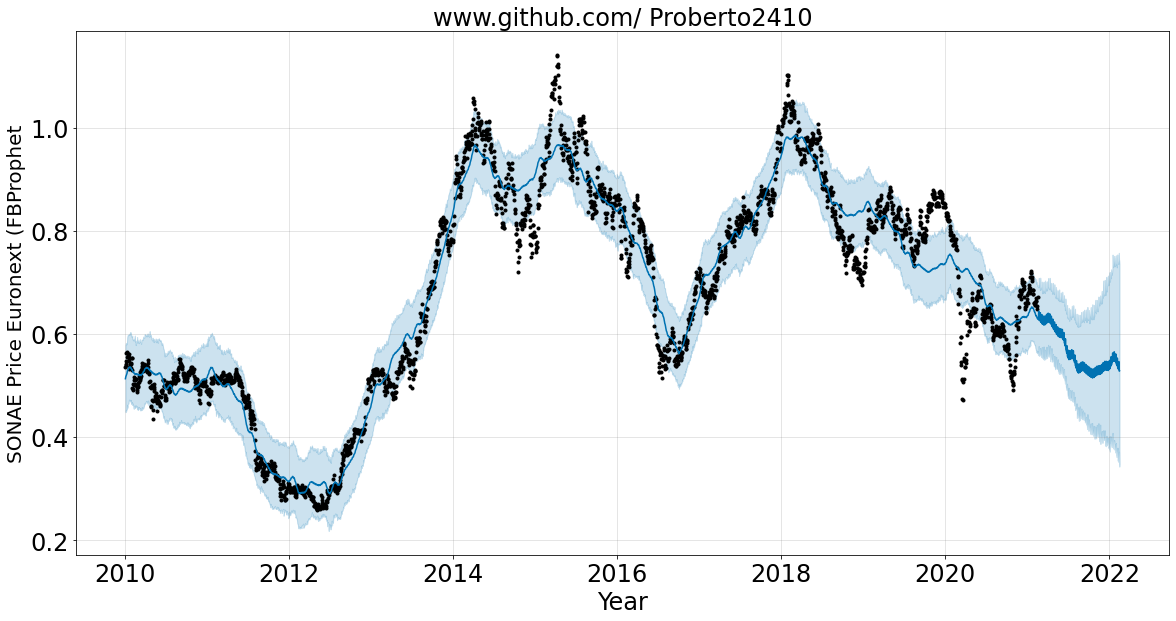

In [84]:
#Plotting the forecast
fig = son.plot(forecast, xlabel='Date', ylabel='Value', figsize = (16, 8))
ax = fig.gca()
ax.set_title("www.github.com/ Proberto2410", size=24)
ax.set_ylabel("SONAE Price Euronext (FBProphet", size=20)
ax.set_xlabel("Year", size=24)
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=24)

To evaluate the components of the forecast, we can apply the code son.plot_components (forecast), calling the function components.

By default, the trend will be shown, with the annual and weekly seasonality of the time series.

We can see some specific behaviors (increases and decreases) in SONAE prices in the weekly and monthly trend graphs.

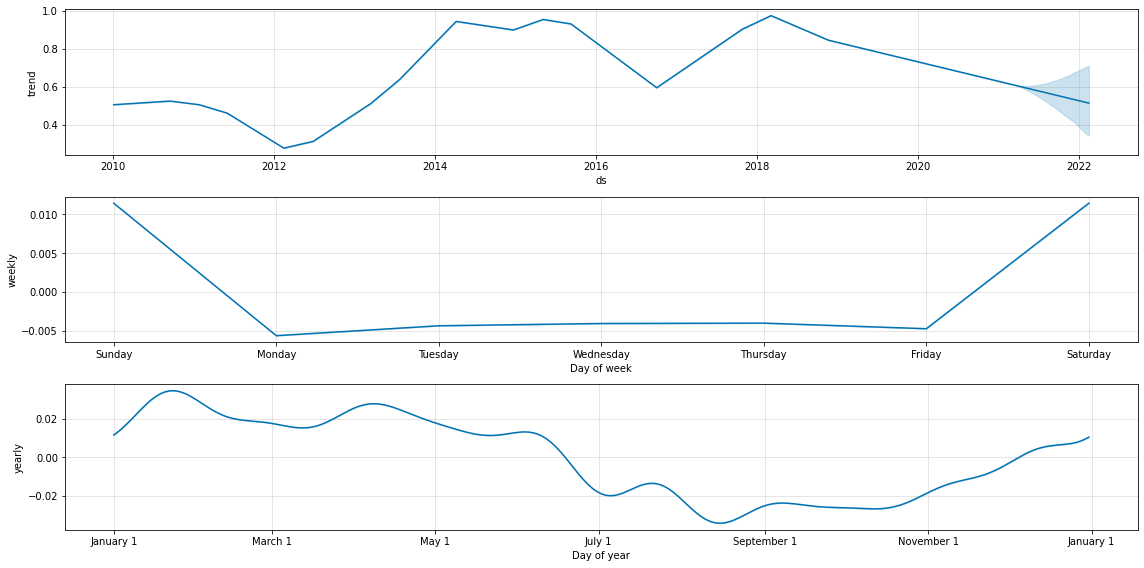

In [76]:
son.plot_components(forecast, figsize = (16, 8));

The cross validation process is very important and Prophet included  this capability. So it is included a functionality to measure forecast errors using historical data.

In [77]:
from fbprophet.diagnostics import performance_metrics

from fbprophet.diagnostics import cross_validation

In [78]:
son_cv = cross_validation(son, initial='730 days', period='90 days', horizon = '365 days')

son_cv.tail(10)

INFO:fbprophet:Making 33 forecasts with cutoffs between 2012-03-29 00:00:00 and 2020-02-16 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
8413,2021-02-02,0.714296,0.529393,0.901596,0.6610,2020-02-16
8414,2021-02-03,0.714146,0.524577,0.902148,0.6570,2020-02-16
8415,2021-02-04,0.713234,0.526014,0.902738,0.6570,2020-02-16
8416,2021-02-05,0.711634,0.532948,0.894870,0.6620,2020-02-16
8417,2021-02-08,0.707829,0.510219,0.897539,0.6635,2020-02-16
8418,2021-02-09,0.708207,0.519828,0.902746,0.6690,2020-02-16
8419,2021-02-10,0.708378,0.516065,0.904916,0.6630,2020-02-16
8420,2021-02-11,0.707872,0.520773,0.909181,0.6550,2020-02-16
8421,2021-02-12,0.706756,0.496465,0.911581,0.6475,2020-02-16
8422,2021-02-15,0.704739,0.501259,0.907858,0.6715,2020-02-16


In [79]:
son_p = performance_metrics(son_cv)

son_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,0.013987,0.118266,0.093044,0.124921,0.098858,0.234660
1,38 days,0.014443,0.120178,0.094834,0.127378,0.101137,0.229018
2,39 days,0.014789,0.121609,0.096028,0.129181,0.102512,0.226892
3,40 days,0.015159,0.123121,0.097182,0.130955,0.104022,0.223484
4,41 days,0.015483,0.124430,0.098344,0.132526,0.105839,0.218579
...,...,...,...,...,...,...,...
324,361 days,0.106643,0.326563,0.270138,0.348647,0.295150,0.507797
325,362 days,0.107008,0.327121,0.270962,0.350047,0.296383,0.505370
326,363 days,0.107010,0.327124,0.271159,0.350372,0.296742,0.504286
327,364 days,0.106465,0.326290,0.270593,0.349655,0.296742,0.506196
